In [41]:
import json
import numpy as np
import pandas as pd
import csv
import ast

In [2]:
def read_json_ds(path):
    with open(path) as data_file:
        return [json.loads(line) for line in data_file]

In [7]:
bus = read_json_ds("yelp_academic_dataset_business.json")

In [15]:
rest_id = set(pd.read_csv("austin_only/austin_rest.csv").business_id.values)

In [17]:
bus_austin = [x for x in bus if x["business_id"] in rest_id]

In [83]:
def denest_dict(d):
    out = dict()
    for k, v in d.items():
        try:
            v = ast.literal_eval(v)
        except:
            pass
        if isinstance(v, dict):
            nested_d = denest_dict(v)
            for nk, nv in nested_d.items():
                out['_'.join([k, nk])] = nv
        else:
            out[k] = v
    return out

In [87]:
bus_denested = [denest_dict(x) for x in bus_austin]

In [104]:
def split_categories(cat_str):
    return {"category_" + x.strip() : True for x in cat_str.split(",")}

In [107]:
for v in bus_denested:
    v.update(split_categories(v.pop("categories")))

In [109]:
df = pd.DataFrame(bus_denested)

In [136]:
occ_num = df.shape[0] - df.isna().sum(0)

<AxesSubplot:ylabel='Count'>

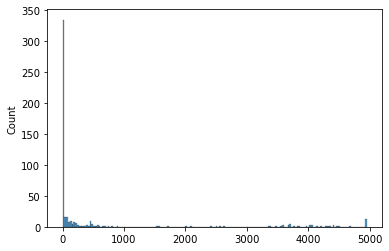

In [148]:
import seaborn as sns
sns.histplot(occ_num)

In [140]:
valid_columns = df.columns[occ_num > 100]

In [141]:
valid_columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count',
       ...
       'category_Arts & Entertainment', 'category_Barbeque',
       'category_Ice Cream & Frozen Yogurt', 'category_Beer',
       'category_Wine & Spirits', 'category_Bakeries', 'category_Sports Bars',
       'category_Vegan', 'category_Thai', 'category_Street Vendors'],
      dtype='object', length=129)

In [142]:
df_valid = df[valid_columns]

In [147]:
df_valid.to_csv("attributes_cat_as_columns.csv", index=False)